DATA CLEANING FOR GUI APP

In [10]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from astropy.visualization import hist
import csv
from IPython.display import display
import json
from functools import reduce
import seaborn as sns
from platform import python_version 

pd.set_option('display.max_rows', None,'display.max_columns', None, 'max_colwidth', 20)
airport_data = pd.read_csv(r'airports.csv', delimiter = ',', usecols=['ident','type', 'name', 'iso_country'])
df1 = airport_data



# filter out airports in GB
df1_mask=df1['iso_country']=='GB'
df1 = df1[df1_mask]

# Get important columns

#df1 = df1.set_index('id')

# drop closed, heliport, and balloon ports and seaplaneports

values = ['closed','heliport','balloonport','seaplaneport']
df1 = df1[df1.type.isin(values) == False]
df1 = df1.sort_values(by ='type')
df1.head(20)








,ident,type,name,iso_country
20961,EGHI,large_airport,Southampton Airport,GB
20905,EGCN,large_airport,Robin Hood Donca...,GB
20896,EGCC,large_airport,Manchester Airport,GB
21029,EGNX,large_airport,East Midlands Ai...,GB
21025,EGNT,large_airport,Newcastle Airport,GB
21081,EGSS,large_airport,London Stansted ...,GB
21020,EGNM,large_airport,Leeds Bradford A...,GB
21044,EGPF,large_airport,Glasgow Internat...,GB
21092,EGTE,large_airport,Exeter Internati...,GB
20994,EGLL,large_airport,London Heathrow ...,GB


In [11]:
pd.set_option('display.max_rows', None,'display.max_columns', None, 'max_colwidth', 20)
airport_freq = pd.read_csv(r'airport-frequencies.csv', delimiter = ',')
# fill missing values, NAN with 0 so you don't loss data

airport_freq = airport_freq.fillna(0)

df2 = airport_freq
#rename column airport_ident to 'ident' match the column name of df1
df2.rename(columns = {'airport_ident':'ident'}, inplace = True)
# select the two columns from data
df2 = df2[['ident','frequency_mhz']]

pd.set_option('display.max_rows', None,'display.max_columns', None, 'max_colwidth', 20)
runway = pd.read_csv(r'runways.csv', delimiter = ',')
df4 = runway
df4 = df4.dropna()
df4 = df4[['id', 'airport_ref', 'airport_ident', 'closed']]
df4.rename(columns={'airport_ident': 'ident'}, inplace=True)
df4.tail()
# merge on ident
df3 = pd.merge(df1,df2, on = 'ident')
df3 = pd.merge(df3, df4, on ='ident')
# fill empty values with 0
df3 = df3.fillna(0)
# drop un important colums using the slicing method...
df3.drop(df3.columns[5:],axis=1, inplace=True)


df3














,ident,type,name,iso_country,frequency_mhz
0,EGHI,large_airport,Southampton Airport,GB,128.850
1,EGHI,large_airport,Southampton Airport,GB,113.350
2,EGHI,large_airport,Southampton Airport,GB,121.775
3,EGHI,large_airport,Southampton Airport,GB,130.650
4,EGHI,large_airport,Southampton Airport,GB,118.200
5,EGCN,large_airport,Robin Hood Donca...,GB,126.225
6,EGCN,large_airport,Robin Hood Donca...,GB,134.950
7,EGCN,large_airport,Robin Hood Donca...,GB,121.600
8,EGCN,large_airport,Robin Hood Donca...,GB,110.950
9,EGCN,large_airport,Robin Hood Donca...,GB,126.225


In [12]:
small_df = df3[df3['type']=='small_airport']
small_df = small_df.rename(columns={'type':'Small_airport', 'frequency_mhz' : 'Small_freq','name': 'Small_name'},)
small_df = small_df.drop(['iso_country'], axis = 1)
# find shape of data before merge
small_df.shape

medium_df = df3[df3['type']=='medium_airport']
medium_df = medium_df.rename(columns={'type':'Medium_airport','frequency_mhz' : 'Medium_freq','name': 'Medium_name'})
medium_df = medium_df.drop(['iso_country'], axis = 1)
medium_df.shape

large_df = df3[df3['type']=='large_airport']
large_df = large_df.rename(columns={'type':'Large_airport','frequency_mhz' : 'Large_freq','name': 'Large_name'})
large_df = large_df = large_df.drop(['iso_country'], axis = 1)
large_df.shape
# perform outer merge,  on ident to retain all values..
dfx = pd.merge(small_df, medium_df, on = 'ident', how = 'outer')

dfs = pd.merge(dfx, large_df, on = 'ident', how = 'outer')
dfs = dfs.fillna(0)
dfs.head()




,ident,Small_airport,Small_name,Small_freq,Medium_airport,Medium_name,Medium_freq,Large_airport,Large_name,Large_freq
0,EGCW,small_airport,Welshpool Airport,128.000,0,0,0.0,0,0,0.0
1,EGEO,small_airport,Oban Airport,118.055,0,0,0.0,0,0,0.0
2,EGFA,small_airport,Aberporth Airport,122.150,0,0,0.0,0,0,0.0
3,EG74,small_airport,Bruntingthorpe A...,122.825,0,0,0.0,0,0,0.0
4,EGBO,small_airport,Wolverhampton Ha...,123.000,0,0,0.0,0,0,0.0


In [13]:
mode = lambda x: pd.Series.mean(pd.Series.mode(x))
lfreq_100 = large_df.loc[large_df['Large_freq'] > 100].agg(['mean', 'median', mode])
mfreq_100 = medium_df.loc[medium_df['Medium_freq'] > 100].agg(['mean', 'median', mode])
sfreq_100 = small_df.loc[small_df['Small_freq'] > 100].agg(['mean', 'median', mode])
lfreq_100 = lfreq_100.round(decimals=2)
# swapping rows with columns(transpose)
lfreq_100 = lfreq_100.T
# then rename columns
lfreq_100 = lfreq_100.rename(columns={'<lambda>': 'mode'})

print(lfreq_100)
print()
print(mfreq_100)
print()
print(sfreq_100)

             mean  median   mode
Large_freq  123.5   121.8  121.8

          Medium_freq
mean       138.208721
median     123.600000
<lambda>   123.600000

          Small_freq
mean      137.271591
median    123.000000
<lambda>  123.000000


In [14]:
mode = lambda x: pd.Series.mean(pd.Series.mode(x))
medium = dfs.groupby('Medium_airport').Medium_freq.agg(['mean','median',mode])
medium = medium.rename(columns={'<lambda_0>':'mode'})
medium = medium.round(decimals=2)
print(medium)

                  mean  median   mode
Medium_airport                       
0                 0.00     0.0    0.0
medium_airport  136.94   123.6  123.6


In [15]:
mode = lambda x: pd.Series.mean(pd.Series.mode(x))
small = dfs.groupby('Small_airport').Small_freq.agg(['mean','median',mode])
small= small.rename(columns={'<lambda_0>':'mode'})
small = small.round(decimals=2)
print(small)

                 mean  median   mode
Small_airport                       
0                0.00     0.0    0.0
small_airport  137.27   123.0  123.0


In [16]:
# filter out aitports to display data susbsets by creating a subset and filtering out the zeros
small_data = dfs[['ident','Small_airport','Small_freq']]
small_data = small_data[(small_data.Small_freq  != 0)]


In [17]:
# filter out aitports to display data susbsets by creating a subset and filtering out the zeros
medium_data = dfs[['ident','Medium_airport','Medium_freq']]
medium_data = medium_data[(medium_data.Medium_freq  != 0)]

In [18]:
large_data = dfs[['ident', 'Large_airport', 'Large_freq']]
large_data = large_data[(large_data.Large_freq != 0)]
# getting the mean of two values that will be calculated for the mode, when you use a pd series....
mode = lambda x: pd.Series.mean(pd.Series.mode(x))
large = large_data.groupby('Large_airport').Large_freq.agg(['mean', 'median', mode])
large = large.rename(columns={'<lambda_0>': 'mode'})
# round to 2 decimal places
large = large.round(decimals=2)
print(large)


                 mean  median   mode
Large_airport                       
large_airport  122.22   121.8  121.8


In [19]:
 # all large airport frequencies greater than 100
large_data = dfs[['ident', 'Large_airport', 'Large_freq']]
large_data = large_data[(large_data.Large_freq != 0)]
# get the mode using lambda and pd.series...
mode = lambda x: pd.Series.mean(pd.Series.mode(x))
large_100 = large_data.loc[large_data['Large_freq'] > 100].agg(['mean', 'median', mode])

 #rounding up to 2 decimal places
large_100 = large_100.round(decimals=2)
# swapping rows with columns(transpose)
large_100 = large_100.T
# then rename columns
large_100 = large_100.rename(columns={'<lambda>': 'mode'})

print(large_100)


             mean  median   mode
Large_freq  123.5   121.8  121.8


In [20]:
# plotting graph of small airport frequencies

In [21]:

#column_count instances of small airports...
# then plot against frequency
small_freq = small_data['Small_freq']
small_freq = np.array(small_freq)
print(small_freq)
small_data.index = np.arange(1, len(small_data) + 1)
small_data.index

[128.    118.055 122.15  122.825 123.    123.    123.    124.875 124.875
 124.875 123.    123.    123.    118.9   122.175 122.25  121.    121.
 282.57  119.75  278.2   130.475]


Int64Index([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
            20, 21, 22],
           dtype='int64')

<IPython.core.display.Javascript object>


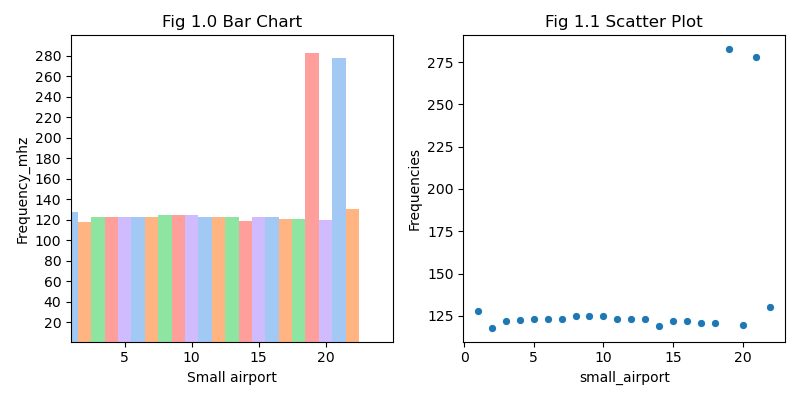

In [22]:
colors = sns.color_palette("pastel")
coord1 = 121
coord2 = 122
fig = plt.figure('Small Airport Frequency', figsize=(8, 4))
plt.subplot(coord1)
x = small_data.index
y = small_freq
plt.xlabel('Small airport')
plt.ylabel('Frequency_mhz')
plt.title("Fig 1.0 Bar Chart")
plt.bar(x, y, color=colors[:5], width=1)
l1 = np.arange(0, 25, 5)
l2 = np.arange(0, 300, 20)
plt.xticks(l1)
plt.yticks(l2)
plt.xlim(1, 25)
plt.ylim(1, 300)
plt.subplot(coord2)
small_data = dfs[['Small_airport', 'Small_freq']]
small_data = small_data[(small_data.Small_freq != 0)]
small_data.index = np.arange(1, len(small_data) + 1)
new_data = {'small_airport': small_data.index, 'Frequencies': small_freq}
new_data = pd.DataFrame(new_data)
new_data
plt.title("Fig 1.1 Scatter Plot")
sns.scatterplot(x='small_airport', y='Frequencies', data=new_data)
plt.tight_layout()
plt.show()
plt.tight_layout()
plt.show()

In [23]:
#....now to find correlation...
#reset index ...to enable proper data matrix
# correlation is 1, when a value correlates to itself...
# correlation between small and medium is -0.5, between small and large is 0.28, and medium and large is 0.35..
# Therefore the correlation between small and medium frequency is higher as it is edges closer to 1.

corr_1 =dfs.corr()
corr_1 = corr_1.reset_index()
corr_1 = corr_1.round(decimals=2)
corr_1

,index,Small_freq,Medium_freq,Large_freq
0,Small_freq,1.00,-0.29,-0.29
1,Medium_freq,-0.29,1.00,-0.69
2,Large_freq,-0.29,-0.69,1.00


<IPython.core.display.Javascript object>


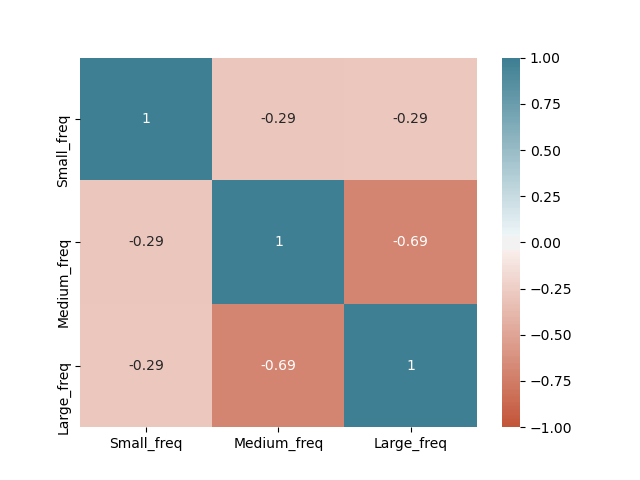

In [24]:
##plot heatmap to show correlation
#plt.figure(figsize=(15, 2))
colors = sns.color_palette('pastel')
fig = plt.figure('Frequency Communications Correlation')
corr_1 = dfs.corr()
        # sns.heatmap(corr_1,annot=True)
sns.heatmap(corr_1, annot=True, vmax=1, vmin=-1, center=0, cmap=sns.diverging_palette(20, 220, n=200))       
plt.show()

In [25]:
# find mode of frequency_mhz in the whole dataframe:
new_mode=df3['frequency_mhz'].mode()
print(new_mode)

0    123.0
1    123.6
dtype: float64


In [26]:
python_version()

'3.8.3'